<a href="https://colab.research.google.com/github/ttrevorreese/finalyearproject/blob/main/Map_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Map Tests**

---

This Colab notebook is for testing the implementation of the algorithms tested in creating maps that display the outputs of the bus routes created.

**Note: These tests will be conducted with the bare bones 'BusStops_v1' dataset.**

# Importing Dataset and Libraries

---

In [ ]:
from array import array
import pandas as pd
import time
import math

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/! University of Roehampton/Year 3/! Final Year Project/Datasets/BusStops_v1 - Sheet1.csv')

data.drop(['Scores', 'Notes'], axis=1, inplace=True)

data.head(10)

,Stop Name,Latitude,Longitude,Classification
0,Heritage Marketplace,33.640179,-117.168344,Commercial
1,Sonoma at Mapleton Apartments,33.631778,-117.169029,Residential
2,Mapleton & Iris,33.632067,-117.160945,Residential
3,Whitewood & Mapleton,33.632119,-117.154617,Residential
4,Poinsettia & Verbena,33.629445,-117.151333,Residential
5,Mapleton Park,33.628591,-117.163263,Community
6,Kaiser Permanente @ Keller,33.627069,-117.168017,Services
7,Springbrook Park,33.626276,-117.162660,Community
8,Keller & Whitewood,33.626974,-117.157986,Residential
9,Meadowlark & Brians,33.623213,-117.162675,Residential


In [ ]:
# Storing latitude and longitude into a list each
lat = data["Latitude"]
lon = data["Longitude"]

In [ ]:
# https://stackoverflow.com/questions/71518804/how-create-a-ordered-pair-function-in-python
def OrderedPair(A, B):
  return[[lat, lon] for lat in A for lon in B]

latlon = OrderedPair(lat, lon)
print(latlon)

In [ ]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
#!pip install numpy

# Visualization in Python: Finding Routes between Points

---

From: https://towardsdatascience.com/visualization-in-python-finding-routes-between-points-2d97d4881996

In [ ]:
import numpy
import osmnx as ox
import networkx as nx
ox.config(log_console=True, use_cache=True)
# define the start and end locations in latlng
start_latlng = (33.56453691	-117.2322688)
end_latlng = (33.56424954	-117.1968314)
# location where you want to find your route
place     = 'Murrieta, California, United States'
# find shortest route based on the mode of travel
mode      = 'drive'        # 'drive', 'bike', 'walk'
# find shortest path based on distance or time
optimizer = 'length'        # 'length','time'
# create graph from OSM within the boundaries of some 
# geocodable place(s)
graph = ox.graph_from_place(place, network_type = mode)
# find the nearest node to the start location
orig_node = ox.nearest_nodes(graph, start_latlng, end_latlng)
# find the nearest node to the end location
dest_node = ox.nearest_nodes(graph, start_latlng, end_latlng)
#  find the shortest path
shortest_route = nx.shortest_path(graph,
                                  orig_node,
                                  dest_node,
                                  weight=optimizer)
print(graph)
print(shortest_route)

/usr/local/lib/python3.8/dist-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


MultiDiGraph with 2856 nodes and 6786 edges
[54304884]


# Advanced Street Network Plotting with OSMnx

---

From: https://github.com/gboeing/osmnx-examples/blob/v0.15.1/notebooks/15-advanced-plotting.ipynb

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.8/dist-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


'1.2.2'

In [ ]:
place = 'Murrieta, California, USA'
G = ox.graph_from_place(place, network_type='drive')

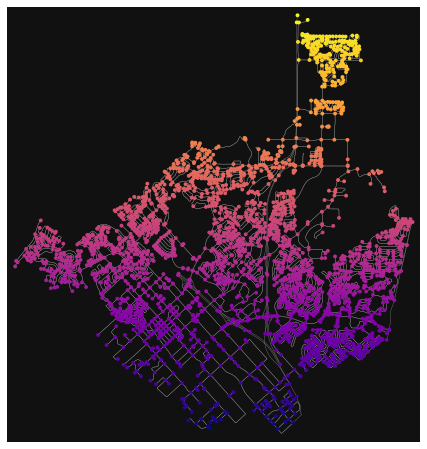

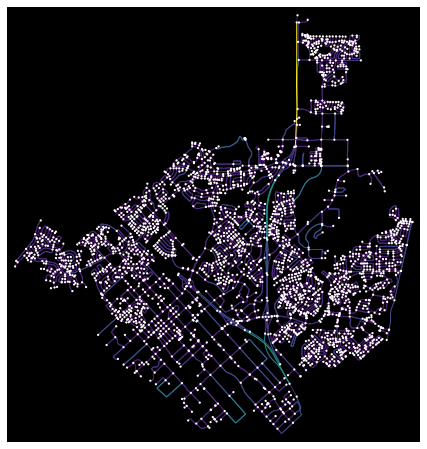

In [ ]:
# get n evenly-spaced colors from some matplotlib colormap
ox.plot.get_colors(n=5, cmap='plasma', return_hex=True)
# get node colors by linearly mapping an attribute's values to a colormap
nc = ox.plot.get_node_colors_by_attr(G, attr='y', cmap='plasma')
fig, ax = ox.plot_graph(G, node_color=nc, edge_linewidth=0.3)
# when num_bins is not None, bin the nodes/edges then assign 1 color to each bin
# also set equal_size=True for equal-sized quantiles (requires unique bin edges!)
ec = ox.plot.get_edge_colors_by_attr(G, attr='length', num_bins=5)

# otherwise, when num_bins is None (default), linearly map 1 color to each node/edge by value
ec = ox.plot.get_edge_colors_by_attr(G, attr='length')

# plot the graph with colored edges
fig, ax = ox.plot_graph(G, node_size=5, edge_color=ec, bgcolor='k')

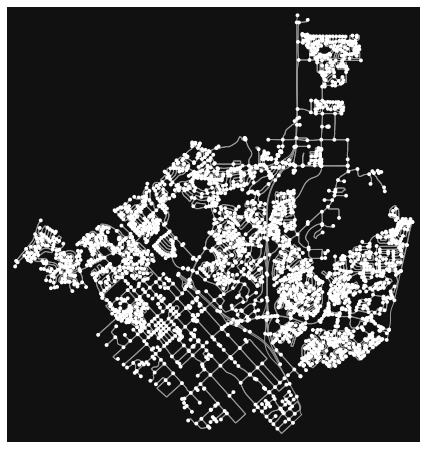

In [ ]:
fig, ax = ox.plot_graph(G,
    ax=None,               #optionally draw on pre-existing axis
    figsize=(8, 8),        #figure size to create if ax is None
    bgcolor="#111111",     #background color of the plot
    node_color="w",        #color of the nodes
    node_size=15,          #size of the nodes: if 0, skip plotting them
    node_alpha=None,       #opacity of the nodes
    node_edgecolor="none", #color of the nodes' markers' borders
    node_zorder=1,         #zorder to plot nodes: edges are always 1, so set node_zorder=0 to plot nodes below edges
    edge_color="#999999",  #color of the edges
    edge_linewidth=1,      #width of the edges: if 0, skip plotting them
    edge_alpha=None,       #opacity of the edges
    show=True,             #if True, call pyplot.show() to show the figure
    close=False,           #if True, call pyplot.close() to close the figure: useful if plotting/saving many in a loop
    save=False,            #if True, save figure to disk at filepath
    filepath=None,         #if save is True, the path to the file
    dpi=300,               #if save is True, the resolution of saved file
    bbox=None)             #bounding box to constrain plot: if None, will calculate from spatial extents of graph

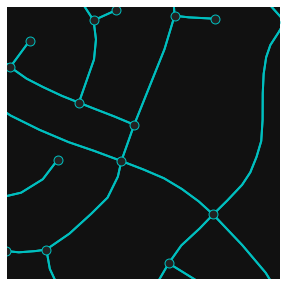

In [ ]:
Gc = ox.consolidate_intersections(ox.project_graph(G), dead_ends=True)
c = ox.graph_to_gdfs(G, edges=False).unary_union.centroid
bbox = ox.utils_geo.bbox_from_point(point=(c.y, c.x), dist=200, project_utm=True)
fig, ax = ox.plot_graph(Gc, figsize=(5, 5), bbox=bbox, edge_linewidth=2, edge_color='c',
                        node_size=80, node_color='#222222', node_edgecolor='c')
# or save a figure to disk instead of showing it
fig, ax = ox.plot_graph(G, filepath='./images/image.png', save=True, show=False, close=True)

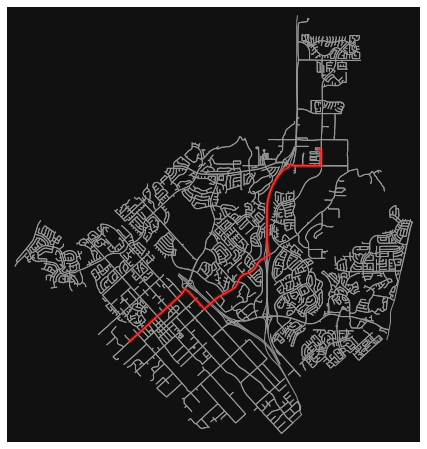

In [ ]:
# impute missing edge speeds and calculate free-flow travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# calculate 3 shortest paths, minimizing travel time
w = 'travel_time'
orig, dest = list(G)[10], list(G)[-10]
route1 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[0], list(G)[-1]
route2 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[-100], list(G)[100]
route3 = nx.shortest_path(G, orig, dest, weight=w)
fig, ax = ox.plot_graph_route(G, route1, orig_dest_size=0, node_size=0)
# you can also pass any ox.plot_graph parameters as additional keyword args
fig, ax = ox.plot_graph_route(G, route1, save=True, show=False, close=True)

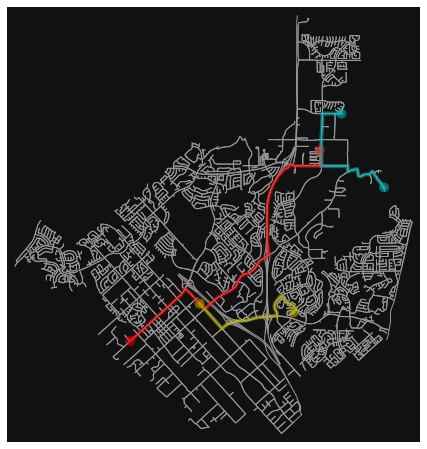

In [ ]:
routes = [route1, route2, route3]
rc = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0)

In [ ]:
G = ox.graph_from_address('Piedmont, CA, USA', dist=200, network_type='drive')
G = ox.get_undirected(G)
fig, ax = ox.plot_graph(G, edge_linewidth=3, node_size=0, show=False, close=False)
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
    text = edge['name']
    c = edge['geometry'].centroid
    ax.annotate(text, (c.x, c.y), c='w')
plt.show()

NetworkXPointlessConcept: ignored

# Geopy

---

From: https://towardsdatascience.com/making-simple-maps-with-folium-and-geopy-4b9e8ab98c00

In [ ]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString
import geopandas as gpd
import folium 
import matplotlib.pyplot as plt
import random

In [ ]:
city_list = ['Accra', 'Cairo', 'Harare', 'Lagos', 'Dakar', 'Kumasi', 'Cape Town', 'Nairobi', 'Pretoria', 'Freetown', 'Algiers', 'Tripoli']

In [ ]:
def get_coordinates(city_list):
    """Takes a list of cities and returns a dictionary of the cities and their corresponding coordinates."""
    geolocator = Nominatim(user_agent="location script")
    dicto = {}
    
    for city in city_list:
        try:
            location = geolocator.geocode(city)
        except:
            raise Exception("There was a problem with the getCoordinates function")
        coordinate_values = (location.longitude, location.latitude)  #in geopandas, the x value corresponds to the longitude while the y value, the latitude(Just in case you were wondering why it was *location.longitude, location.latitude* and not the other way round )
        dicto[city] = coordinate_values #adding the coordinate pair to the dictionary at the end of every loop
    return dicto #finally retruns the dict 

In [ ]:
city_list = ['Accra', 'Cairo', 'Harare', 'Lagos', 'Dakar', 'Kumasi', 'Cape Town', 'Nairobi', 'Pretoria', 'Freetown', 'Algiers', 'Tripoli']
city_coords_dict = get_coordinates(city_list)
city_coords_dict

{'Accra': (-0.2012376, 5.5571096),
 'Cairo': (31.2357257, 30.0443879),
 'Harare': (31.045686, -17.831773),
 'Lagos': (3.3941795, 6.4550575),
 'Dakar': (-17.447938, 14.693425),
 'Kumasi': (-1.6233086, 6.6985605),
 'Cape Town': (18.417396, -33.928992),
 'Nairobi': (36.8172449, -1.2832533),
 'Pretoria': (28.1879101, -25.7459277),
 'Freetown': (-13.26795, 8.479004),
 'Algiers': (3.0601882, 36.7753606),
 'Tripoli': (13.1777923, 32.896672)}

<AxesSubplot: >

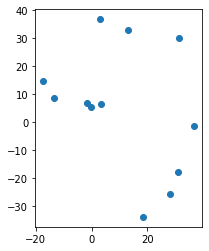

In [ ]:
cities_geom = [Point(i) for i in city_coords_dict.values()]
d = {'Cities':[city for city in city_coords_dict.keys()], 'geometry': cities_geom} #we have to create a gdf so that we can add the crs information so we need geopandas now
cities_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
cities_gdf
cities_gdf.plot() 

<AxesSubplot: >

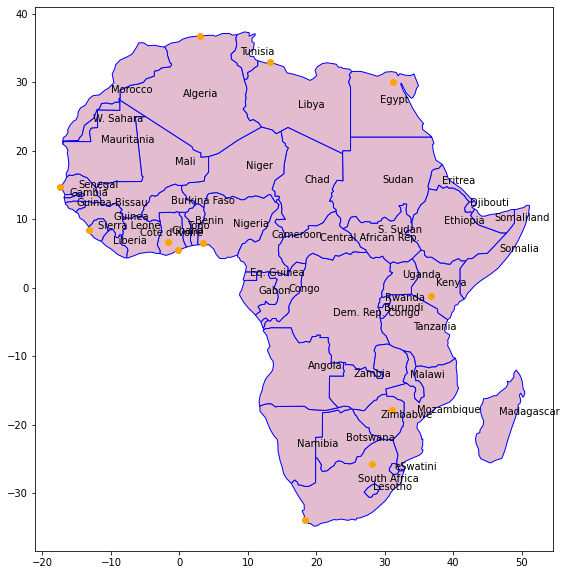

In [ ]:
# load a sample geodataframe
africa_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  
africa_gdf = africa_gdf[africa_gdf['continent'] == 'Africa']

ax = africa_gdf.plot(color =  '#e3bccf', edgecolor = 'blue')
plt.rcParams['figure.figsize'] = [30, 30] #we're able to call this because geopandas is built on top of pandas, which is built on top of  matplotlib

for x, y, label in zip(africa_gdf.geometry.representative_point().x, africa_gdf.geometry.representative_point().y, africa_gdf.name):
    ax.annotate(label, xy=(x, y))
    
cities_gdf.plot(ax=ax, color = 'orange')

In [ ]:
assert cities_gdf.crs == africa_gdf.crs

# Folium

---

From: https://towardsdatascience.com/making-simple-maps-with-folium-and-geopy-4b9e8ab98c00

In [ ]:
gjson_cities = cities_gdf['geometry'].to_json()

my_map = folium.Map(tiles='cartodb positron')
cities = folium.features.GeoJson(gjson_cities)
my_map.add_child(cities)
my_map   

In [ ]:
cities_gdf['Name'] = 'AYK Delivery, ' + cities_gdf['Cities']
cities_gdf['Coords'] = city_coords_dict.values()
cities_gdf['Number_of_Employees'] = random.randint(9, 30)
cities_gdf['Number_of_Employees'] = ['Employee count: {}'.format(random.randint(9, 30)) for entry in cities_gdf['Number_of_Employees']]
cities_gdf['Website'] = ["".join(i.split()).lower() + '.com' for i in cities_gdf['Name']]
cities_gdf

,Cities,geometry,Name,Coords,Number_of_Employees,Website
0,Accra,POINT (-0.20124 5.55711),"AYK Delivery, Accra","(-0.2012376, 5.5571096)",Employee count: 16,"aykdelivery,accra.com"
1,Cairo,POINT (31.23573 30.04439),"AYK Delivery, Cairo","(31.2357257, 30.0443879)",Employee count: 20,"aykdelivery,cairo.com"
2,Harare,POINT (31.04569 -17.83177),"AYK Delivery, Harare","(31.045686, -17.831773)",Employee count: 20,"aykdelivery,harare.com"
3,Lagos,POINT (3.39418 6.45506),"AYK Delivery, Lagos","(3.3941795, 6.4550575)",Employee count: 27,"aykdelivery,lagos.com"
4,Dakar,POINT (-17.44794 14.69342),"AYK Delivery, Dakar","(-17.447938, 14.693425)",Employee count: 19,"aykdelivery,dakar.com"
5,Kumasi,POINT (-1.62331 6.69856),"AYK Delivery, Kumasi","(-1.6233086, 6.6985605)",Employee count: 22,"aykdelivery,kumasi.com"
6,Cape Town,POINT (18.41740 -33.92899),"AYK Delivery, Cape Town","(18.417396, -33.928992)",Employee count: 11,"aykdelivery,capetown.com"
7,Nairobi,POINT (36.81724 -1.28325),"AYK Delivery, Nairobi","(36.8172449, -1.2832533)",Employee count: 12,"aykdelivery,nairobi.com"
8,Pretoria,POINT (28.18791 -25.74593),"AYK Delivery, Pretoria","(28.1879101, -25.7459277)",Employee count: 12,"aykdelivery,pretoria.com"
9,Freetown,POINT (-13.26795 8.47900),"AYK Delivery, Freetown","(-13.26795, 8.479004)",Employee count: 10,"aykdelivery,freetown.com"


In [ ]:
the_map = folium.Map(location=[5.6, 26.17], tiles="cartodbpositron", zoom_start=3.4)

def add_markers_to_the_map(the_map, gdf, color, icon):  
    points = list(zip(gdf.Coords, gdf.Name, gdf.Number_of_Employees, gdf.Website))
    for point in points:         
            popup_text = "{}, {}, {}".format(point[1], str(point[2]), point[3])
        
            popup = folium.Popup(popup_text, autopan='False', parse_html=True)
                
            marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                   popup=popup, 
                                   icon = folium.Icon(icon_size=(25, 25), color=color, icon=icon, prefix='fa')).add_to(the_map)
    return the_map

In [ ]:
add_markers_to_the_map(the_map, cities_gdf, color = 'orange', icon='motorcycle')

In [ ]:
m = folium.Map(location=[33.5539, -117.2139], zoom_start=13)

m

In [ ]:
trail_coordinates = [
    (33.59770024, -117.2409085),
    (33.59775205, -117.2325359),
    (33.59781914, -117.2238415),
    (33.5977537, -117.2116858),
    (33.59551649, -117.1973732),
]

folium.PolyLine(trail_coordinates, tooltip="Clinton Keith").add_to(m)

m

In [ ]:
import json

import requests

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data"
)
vis1 = json.loads(requests.get(f"{url}/vis1.json").text)
vis2 = json.loads(requests.get(f"{url}/vis2.json").text)
vis3 = json.loads(requests.get(f"{url}/vis3.json").text)

In [ ]:
folium.Marker(
    location=[33.59551649, -117.1973732],
    popup=folium.Popup(max_width=450).add_child(
        folium.Popup("Clinton Keith & California Oaks")
    ),
).add_to(m)

m

In [ ]:
folium.Marker(
    location=[33.59551649, -117.1973732],
    popup="Clinton Keith & California Oaks",
    icon=folium.Icon(color="red", icon="home")
).add_to(m)

m